In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


22:29:35 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=488784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=424155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

22:29:37 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=177930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=669501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

22:29:38 INFO      Starting 3ML!                                                                     ]8;id=521762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=407170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=653444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=475533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=992158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=592534;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=687023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=249863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

22:29:40 WARNING   Multinest minimizer not available                                           ]8;id=681593;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=408150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=692131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=634934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

22:29:40 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=735370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=615752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=863803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=141553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:29:41 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=332926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=512708;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

22:29:42 WARNING   No fermitools installed                                              ]8;id=283460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=751075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Myspeedup: 100%|██████████| 31/31 [00:00<00:00, 36.20it/s] 

Yourlib init successfully!!!


Best fit values:

result   
parameter                                                                
J0634P1741u.spectrum.main.Powerlaw.K      (5.1700 +/- 0.0006) x 10^-25  \
J0634P1741u.spectrum.main.Powerlaw.index          -3.81000 +/- 0.00027   
Diffuse.spectrum.main.Powerlaw.K              (1.24 +/- 0.04) x 10^-24   
Diffuse.spectrum.main.Powerlaw.index                    -3.76 +/- 0.06   

                                                     unit  
parameter                                                  
J0634P1741u.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J0634P1741u.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00  0.00 -0.00  0.00
 0.00  1.00  0.00 -0.00
-0.00  0.00  1.00  0.51
 0.00 -0.00  0.51  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A          7446.7554
total         7446.7554

Values of statistical measures:

statistical measures
AIC          14901.510895
BIC          14945.363971

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(99.71191406249999, 15.01753114709345)


<Figure size 640x480 with 0 Axes>

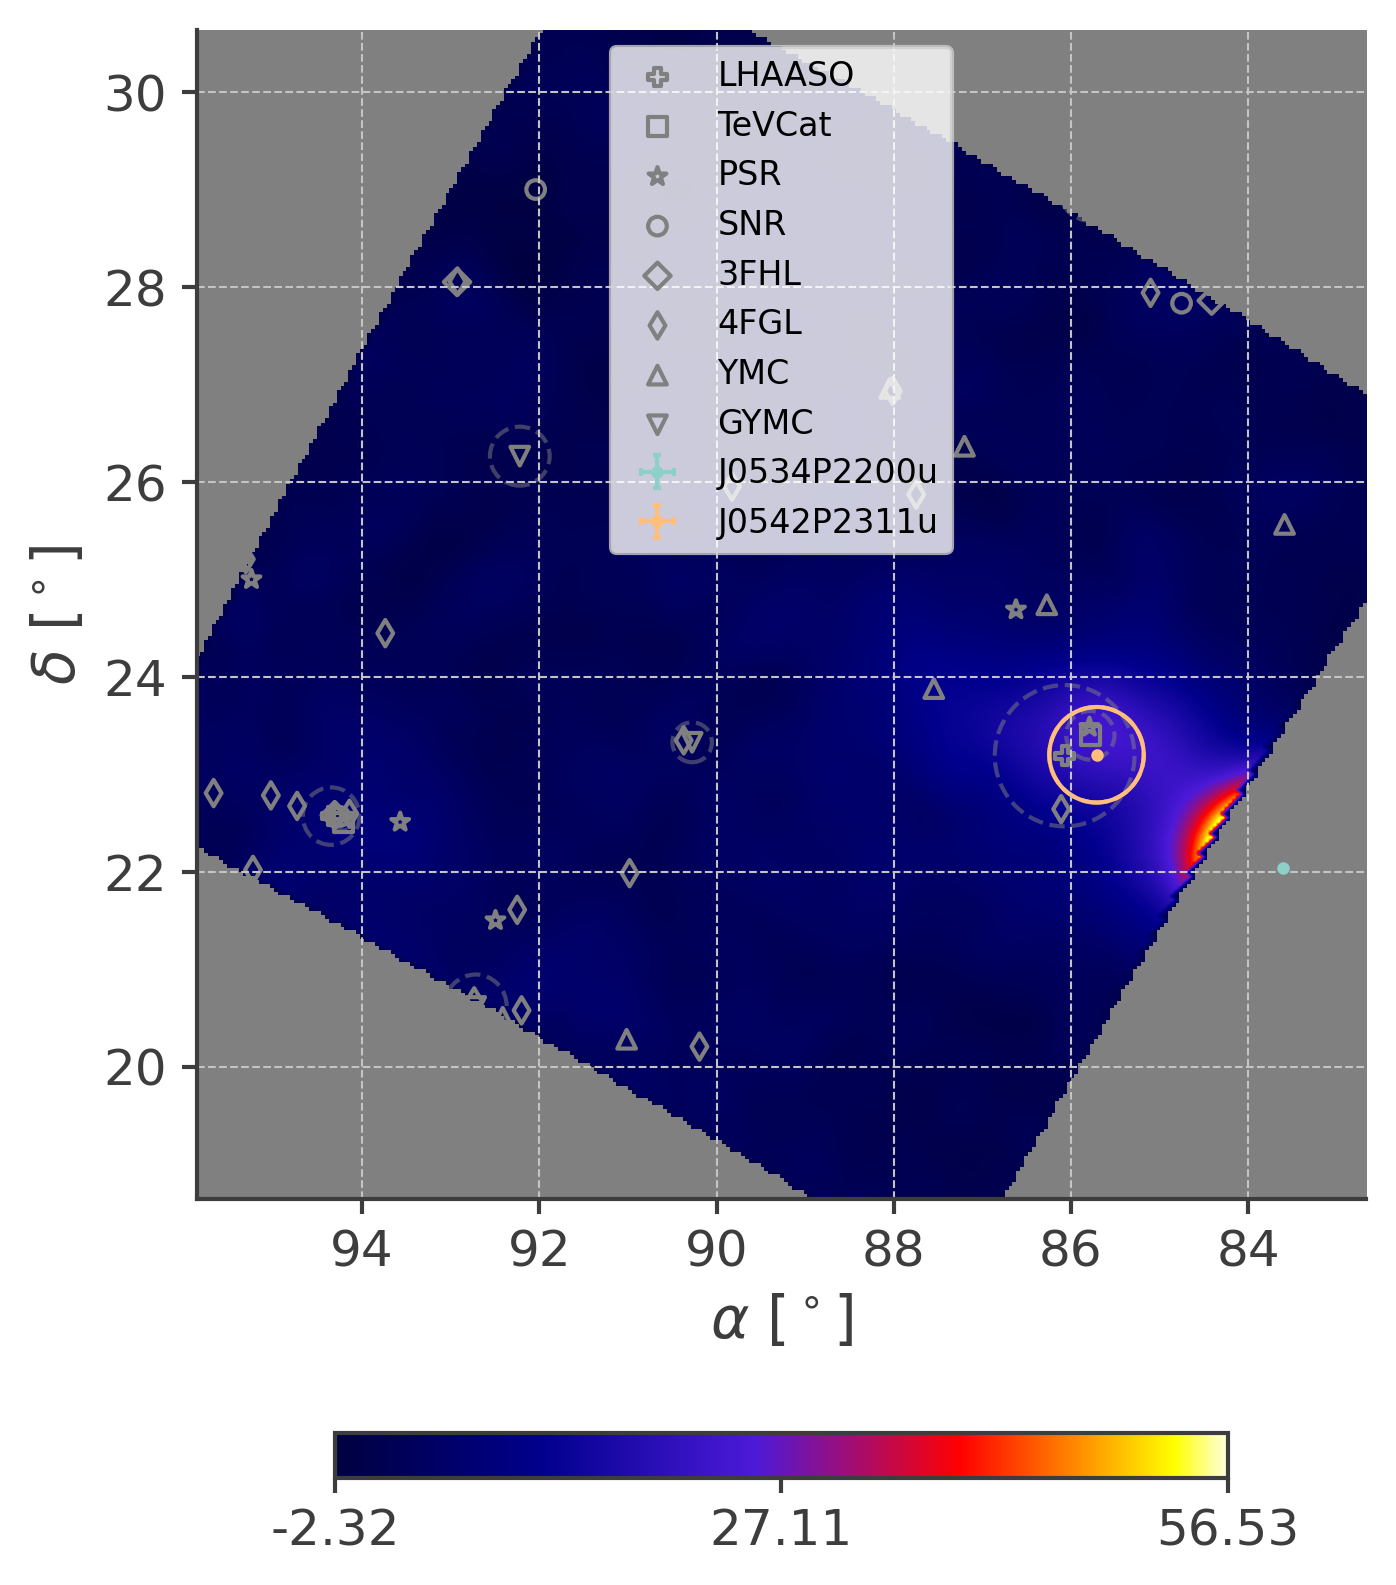

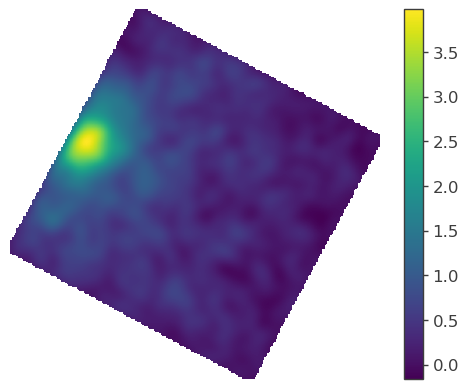

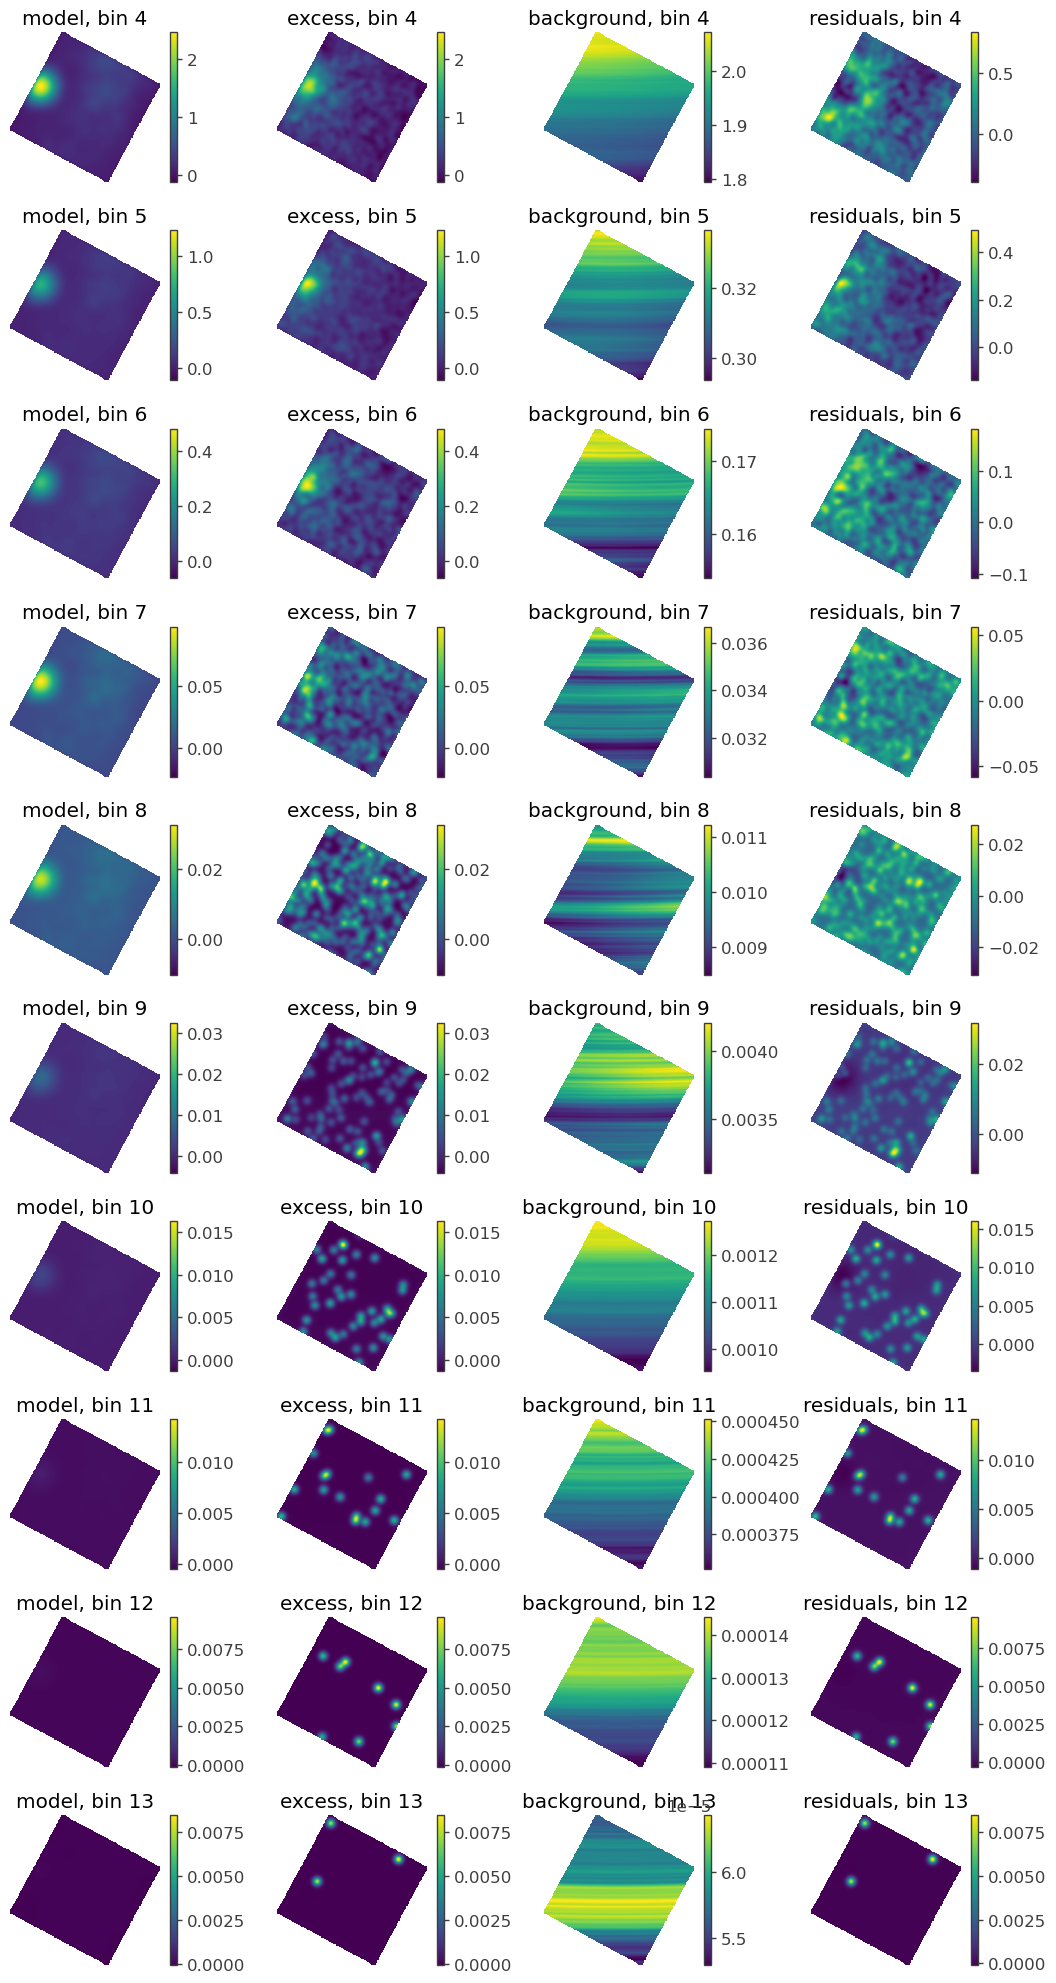

<Figure size 640x480 with 0 Axes>

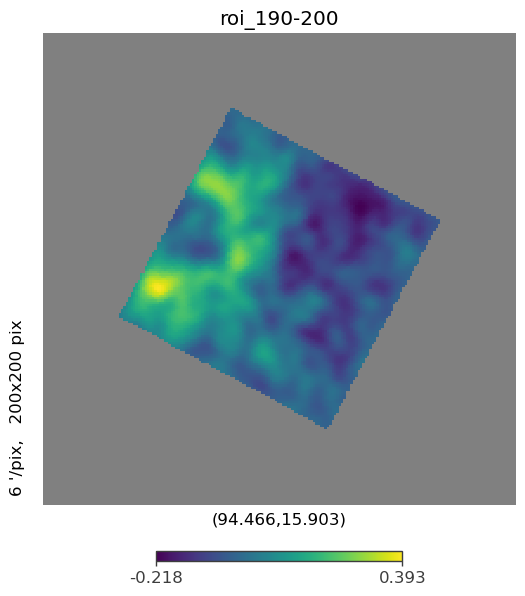

LHAASO:  1 97.77 10.67  1KM2A J0631+1040   3HWC J0631+107(0.06)  0
LHAASO:  2 98.51 17.72  1LHAASO J0634+1741u     1.16
TeVCat:  1 97.69124999999998 18.68111111111111 3HWC J0630+186 0.0
TeVCat:  2 97.78083333333332 10.731388888888889 3HWC J0631+107 0.0
TeVCat:  3 97.95508333333332 10.570194444444445 0FGL J0631.8+1034 0.0
TeVCat:  4 98.11666666666666 17.366666666666667 Geminga 2.6
TeVCat:  5 98.44249999999998 19.113611111111112 3HWC J0633+191 0.0
TeVCat:  6 98.52083333333331 17.803611111111113 Geminga Pulsar 0.0
PSR:  1 89.38104166666666 15.835 J0557+1550
PSR:  2 92.495375 21.500777777777778 J0609+2130
PSR:  3 95.34212499999998 10.044083333333333 J0621+1002
PSR:  4 96.4375 10.266666666666667 J0625+10
PSR:  5 96.80416666666666 16.2 J0627+16
PSR:  6 97.86466666666666 10.617361111111112 J0631+1036
PSR:  7 98.475625 17.77025 J0633+1746
SNR:  1 90.47916666666666 18.4 G190.9-02.2
3FHL:  1 90.092026 12.758432 3FHL J0600.3+1245
3FHL:  2 98.47847 17.774305 3FHL J0633.9+1746
4FGL:  1 90.0816 12.7

00:18:04 INFO      Region of Interest:                                                                   ]8;id=653783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=377664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=903425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=745313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (99.224, 7.055), model radius: 8.000  ]8;id=335832;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=962050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  deg, display radius: 6.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=581597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=470999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=330627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=3629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=217509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=63467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=251253;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=988048;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=748478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=445992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=871898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=850020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=526633;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=389648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=709203;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=116997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=868670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=156302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=397791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=60875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=654467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=615657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=396428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=144242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=479147;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=57988;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=316775;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=159681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING  5.689423e+05  5.674248e+05  1.002674          30462  \
1    1   1024   RING  2.343529e+06  2.337646e+06  1.002516          30462   
2    2   1024   RING  2.043791e+06  2.032106e+06  1.005750          30462   
3    3   1024   RING  6.821926e+05  6.762408e+05  1.008801          30462   
4    4   1024   RING  5.541032e+04  5.297829e+04  1.045906          30462   
5    5   1024   RING  9.952416e+03  8.901172e+03  1.118102          30462   
6    6   1024   RING  5.086359e+03  4.587388e+03  1.108770          30462   
7    7   1024   RING  9.900004e+02  8.989499e+02  1.101285          30462   
8    8   1024   RING  2.838554e+02  2.458877e+02  1.154411          30462   
9    9   1024   RING  8.702603e+01  8.685879e+01  1.001925          30462   
10  10   1024   RING  3.201101e+01  2.835853e+01  1.128796          30462   
11  11   1024   RING  1.401937e+01  1.047606e+01  1.338230          30462   
12  12   1024   RING  3.021697e+00  3.146194e+00  0.960429          30462   
13  13   1024   RING  1.990635e+00  1.573577e+00  1.265039          30462   

    Area (deg^2)  
0      99.869387  
1      99.869387  
2      99.869387  
3      99.869387  
4      99.869387  
5      99.869387  
6      99.869387  
7      99.869387  
8      99.869387  
9      99.869387  
10     99.869387  
11     99.869387  
12     99.869387  
13     99.869387

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=141414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=676012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=203527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=630962;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=861318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=362397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=836433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=360399;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=309927;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=966217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=670780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=498988;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

J0631P1040 in data_radius: 6.0
J0635P0619 in data_radius: 6.0


Model summary:
==============

                  N
Point sources     1
Extended sources  2
Particle sources  0

Free parameters (6):
--------------------

                                         value min_value max_value   
J0631P1040.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J0631P1040.spectrum.main.Powerlaw.index  -3.33     -3.65     -3.01   
J0635P0619.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J0635P0619.spectrum.main.Powerlaw.index  -3.67     -4.03     -3.31   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index    -2.733      -4.0      -1.0   

                                                   unit  
J0631P1040.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0631P1040.spectrum.main.Powerlaw.index                  
J0635P0619.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J0635P0619.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K         keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                     

Fixed parameters (11):
---------------------

                                                                                   value   
J0631P1040.position.ra                                                             97.77  \
J0631P1040.position.dec                                                            10.67   
J0631P1040.spectrum.main.Powerlaw.piv                                      50000000000.0   
J0635P0619.Gaussian_on_sphere.lon0                                                 98.76   
J0635P0619.Gaussian_on_sphere.lat0                                                  6.33   
J0635P0619.Gaussian_on_sphere.sigma                                                  0.6   
J0635P0619.spectrum.main.Powerlaw.piv                                      50000000000.0   
Diffuse.SpatialTemplate_2D.K                                                         1.0   
Diffuse.SpatialTemplate_2D.hash        2390165930055199605540835123115803124000957164...   
Diffuse.SpatialTemplate_2D.ihdu                                                      0.0   
Diffuse.spectrum.main.Powerlaw.piv                                         50000000000.0   

                                      min_value max_value   unit  
J0631P1040.position.ra                    97.55     97.99    deg  
J0631P1040.position.dec                   10.45     10.89    deg  
J0631P1040.spectrum.main.Powerlaw.piv      None      None    keV  
J0635P0619.Gaussian_on_sphere.lon0         98.3     99.22    deg  
J0635P0619.Gaussian_on_sphere.lat0         5.87      6.79    deg  
J0635P0619.Gaussian_on_sphere.sigma        0.46      0.74    deg  
J0635P0619.spectrum.main.Powerlaw.piv      None      None    keV  
Diffuse.SpatialTemplate_2D.K               None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash            None      None         
Diffuse.SpatialTemplate_2D.ihdu             0.0      None         
Diffuse.spectrum.main.Powerlaw.piv         None      None    keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Cache_dust...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Failed to generate proper kernel normalization: got _kernel.sum() = 0.938096; expected 1.0+-0.01.


00:18:07 INFO      Considering 6 dec bins for extended source J0635P0619            ]8;id=364691;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=542842;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 6.330                        ]8;id=909328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=957274;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=972537;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=662923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = 7.001                        ]8;id=771964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=835032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=352580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=761130;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=747573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=342513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                                 
J0631P1040.spectrum.main.Powerlaw.K            (4.20 +/- 0.04) x 10^-26  \
J0631P1040.spectrum.main.Powerlaw.index                  -3.44 +/- 0.14   
J0635P0619.spectrum.main.Powerlaw.K      (7.40000 +/- 0.00023) x 10^-26   
J0635P0619.spectrum.main.Powerlaw.index                  -3.62 +/- 0.16   
Diffuse.spectrum.main.Powerlaw.K               (5.3 -0.4 +0.5) x 10^-25   
Diffuse.spectrum.main.Powerlaw.index                     -3.55 +/- 0.14   

                                                    unit  
parameter                                                 
J0631P1040.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J0631P1040.spectrum.main.Powerlaw.index                   
J0635P0619.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
J0635P0619.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K         1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00  0.02 -0.00 -0.00 -0.01  0.00
 0.02  1.00  0.00  0.02  0.03 -0.07
-0.00  0.00  1.00 -0.00  0.00  0.00
-0.00  0.02 -0.00  1.00  0.04 -0.16
-0.01  0.03  0.00  0.04  1.00  0.20
 0.00 -0.07  0.00 -0.16  0.20  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        5549.188804
total       5549.188804

Values of statistical measures:

statistical measures
AIC          11110.377805
BIC          11176.157363

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(100.7666015625, 12.712092116428124)


<Figure size 640x480 with 0 Axes>

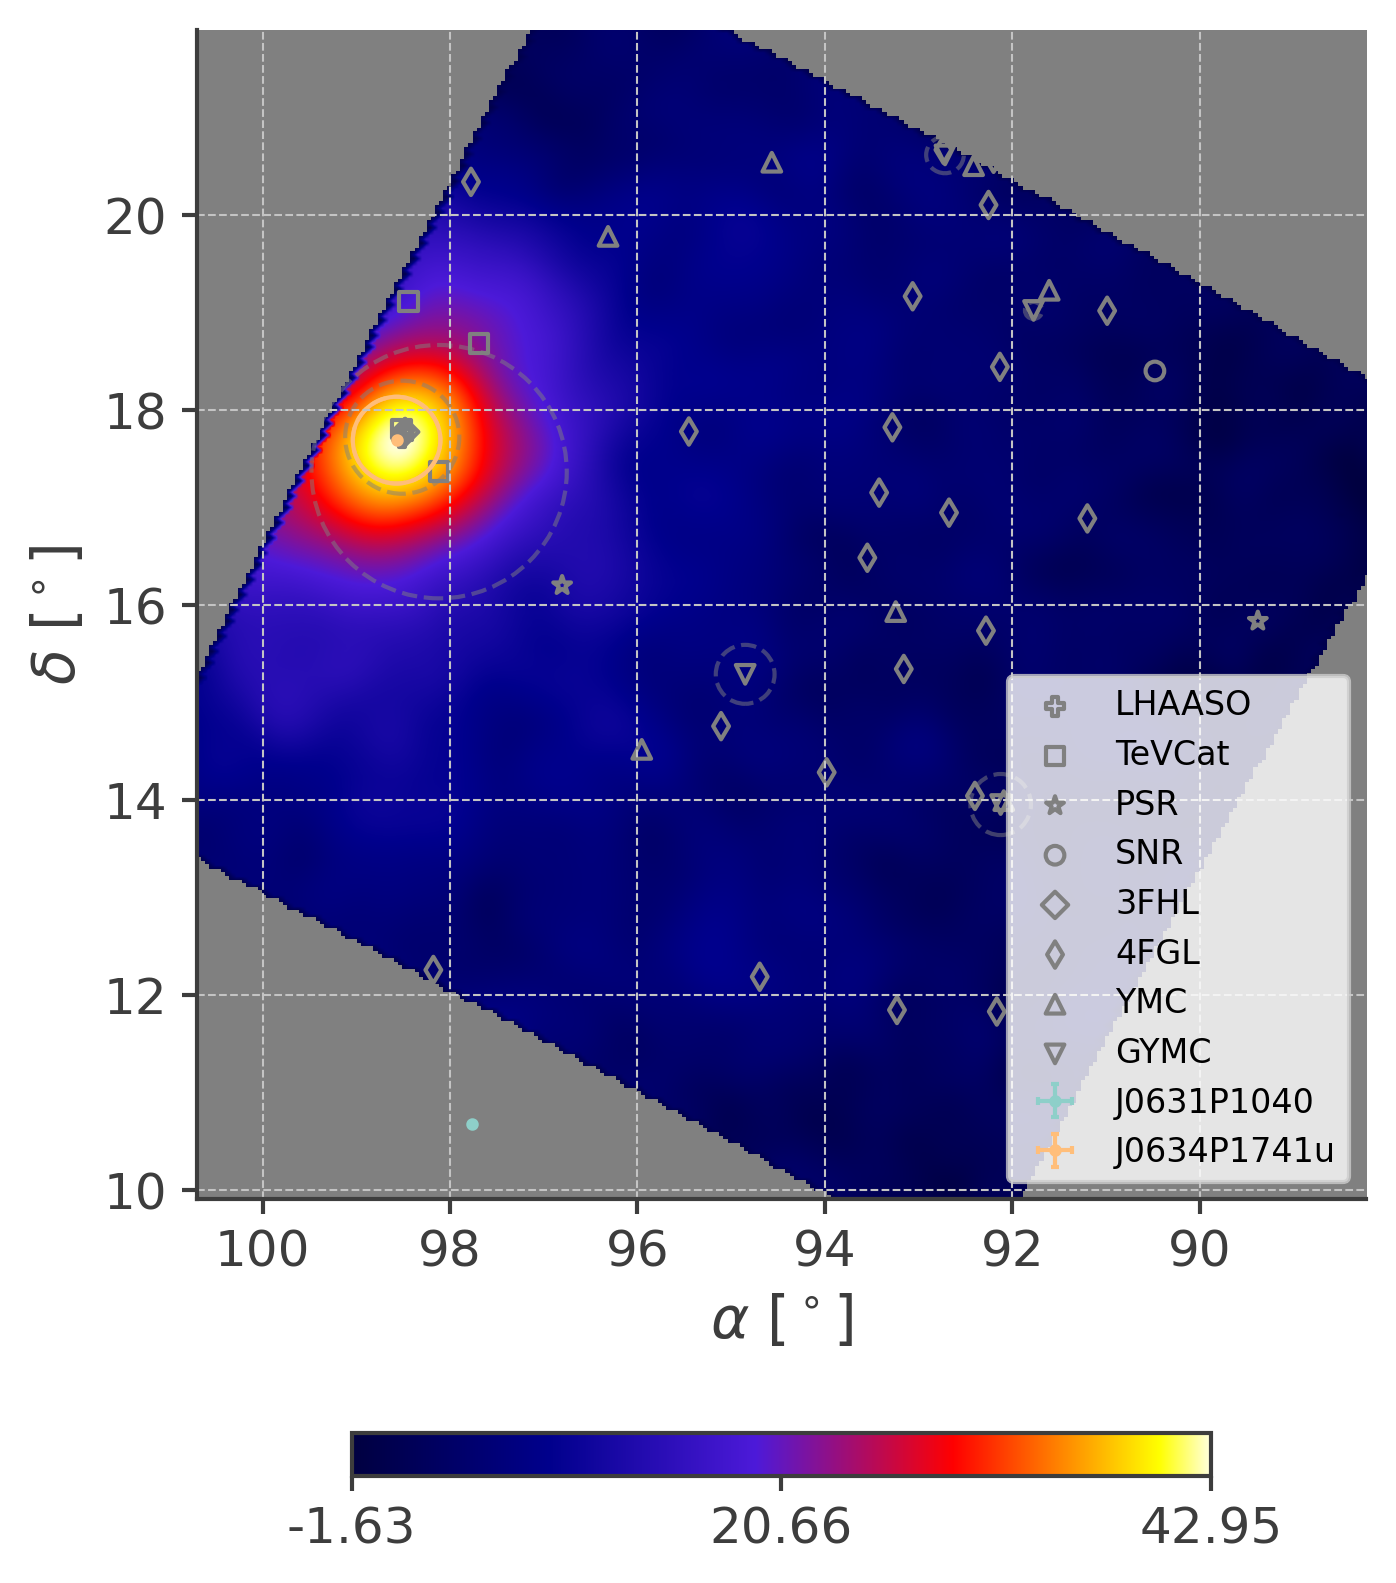

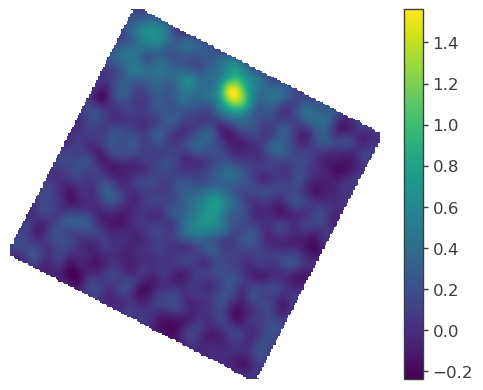

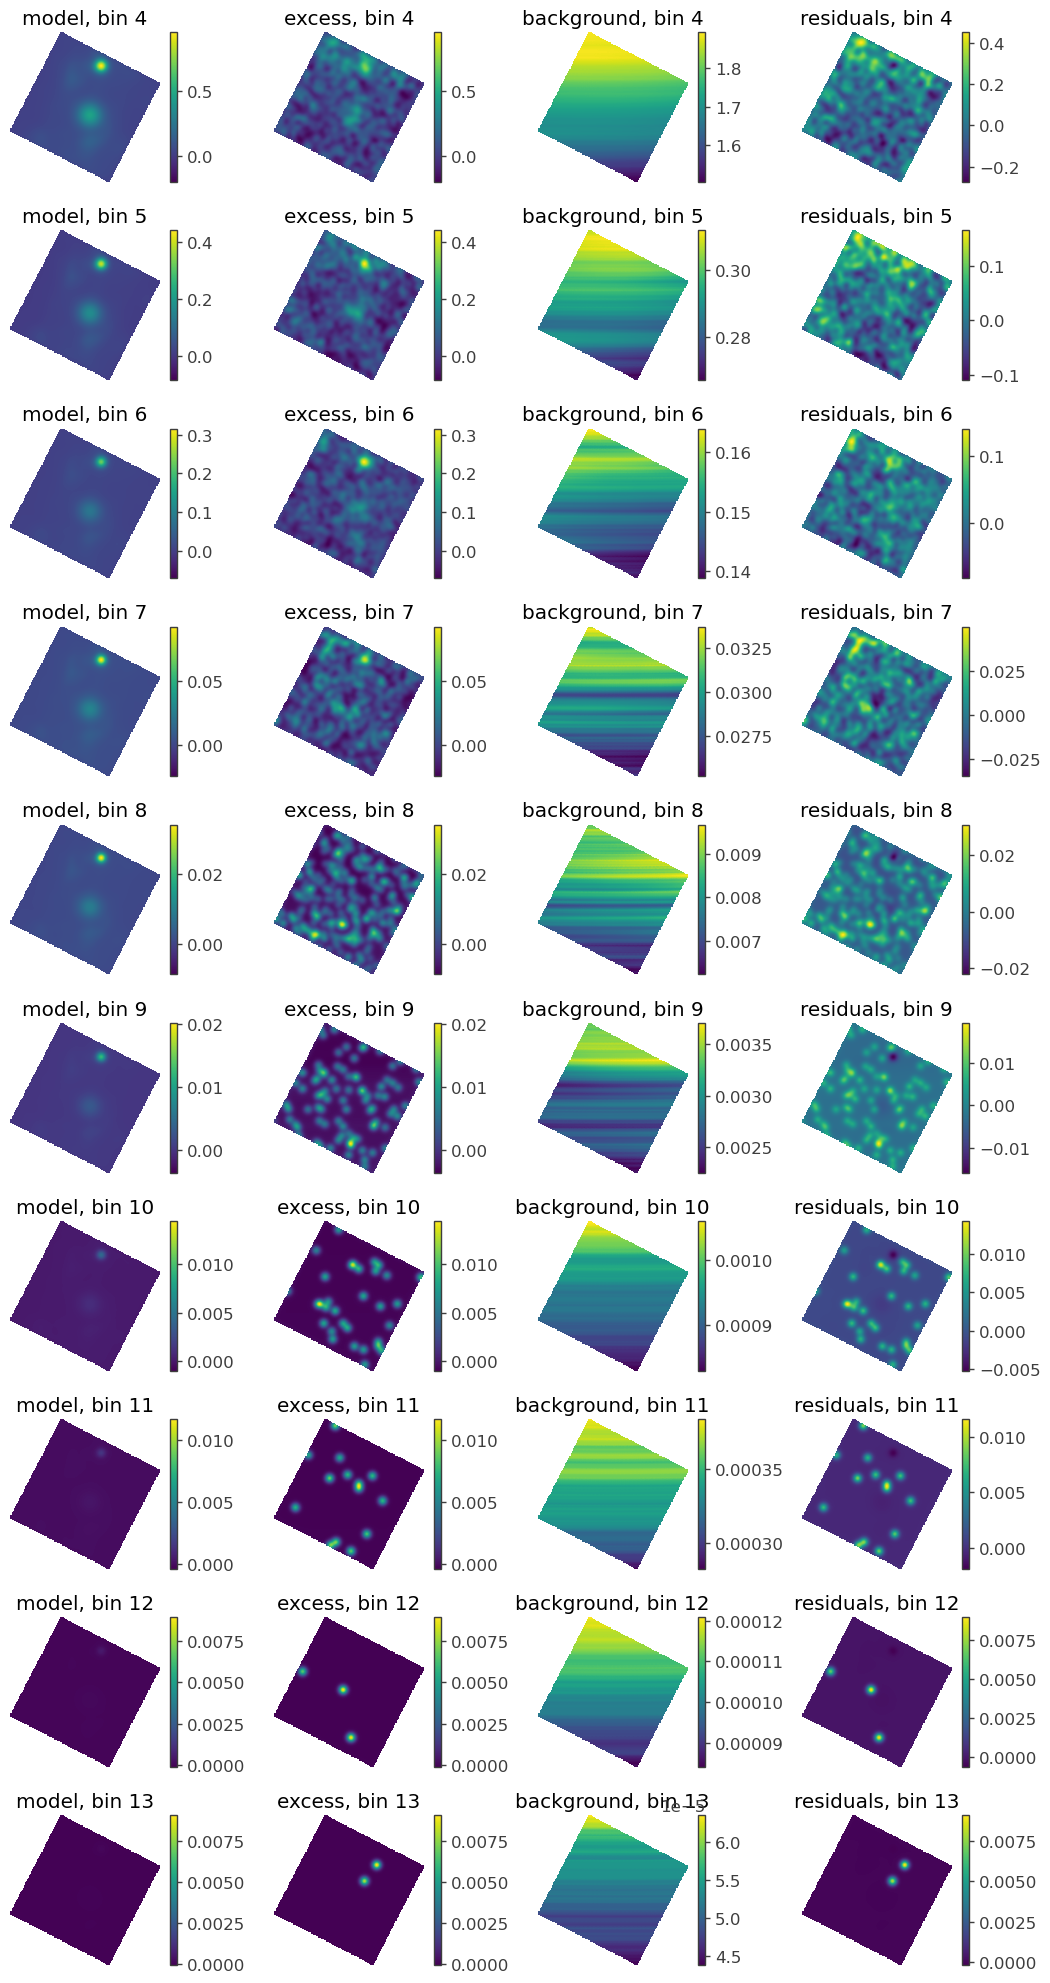

<Figure size 640x480 with 0 Axes>

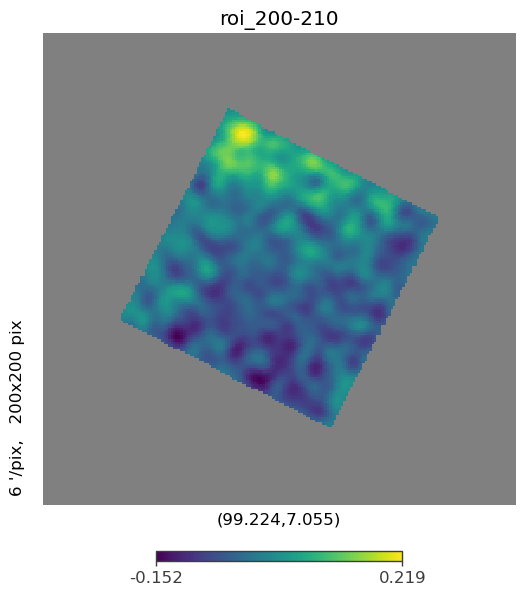

LHAASO:  1 97.77 10.67  1KM2A J0631+1040   3HWC J0631+107(0.06)  0
LHAASO:  2 98.76 6.33  1KM2A J0635+0619    HAWC J0635+070        (0.67) 0
TeVCat:  1 97.78083333333332 10.731388888888889 3HWC J0631+107 0.0
TeVCat:  2 97.95508333333332 10.570194444444445 0FGL J0631.8+1034 0.0
TeVCat:  3 98.25333333333332 5.7941666666666665 HESS J0632+057 0.0
TeVCat:  4 98.71 7.0 HAWC J0635+070 0.65
PSR:  1 95.29674999999999 3.612638888888889 J0621+0336
PSR:  2 95.34212499999998 10.044083333333333 J0621+1002
PSR:  3 95.94483333333332 3.6685555555555553 J0623+0340
PSR:  4 96.4375 10.266666666666667 J0625+10
PSR:  5 96.93404166666666 7.109249999999999 J0627+0706
PSR:  6 96.97345833333333 6.8316944444444445 J0627+0649
PSR:  7 97.15074999999999 9.153861111111112 J0628+0909
PSR:  8 97.86466666666666 10.617361111111112 J0631+1036
PSR:  9 98.43420833333332 6.543027777777778 J0633+0632
PSR:  10 98.82499999999999 5.553055555555555 J0635+0533
PSR:  11 101.62912499999999 9.097027777777779 J0646+0905
PSR:  12 101.

00:20:09 INFO      Region of Interest:                                                                   ]8;id=406998;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=75763;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=31780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=336679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (103.803, -1.840), model radius:      ]8;id=871523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=626644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=231667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=12813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=902880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=720786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=113012;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=912870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=767342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=327353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=504136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=668423;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=984736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=626307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=177384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=975796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=549522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=71077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=553697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=274213;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=769545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=961611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=469868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=404635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=595647;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=455984;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=166542;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=35349;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=209683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=245035;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING  7.353894e+04  7.375866e+04  0.997021          30468  \
1    1   1024   RING  6.823376e+05  6.833346e+05  0.998541          30468   
2    2   1024   RING  1.222048e+06  1.221649e+06  1.000327          30468   
3    3   1024   RING  6.115990e+05  6.088208e+05  1.004563          30468   
4    4   1024   RING  4.197280e+04  4.181272e+04  1.003829          30468   
5    5   1024   RING  8.186746e+03  8.084336e+03  1.012668          30468   
6    6   1024   RING  4.333050e+03  4.305877e+03  1.006311          30468   
7    7   1024   RING  8.551795e+02  7.641012e+02  1.119197          30468   
8    8   1024   RING  2.096465e+02  1.899701e+02  1.103576          30468   
9    9   1024   RING  8.270446e+01  6.740933e+01  1.226899          30468   
10  10   1024   RING  2.657539e+01  2.337005e+01  1.137156          30468   
11  11   1024   RING  7.002794e+00  7.758143e+00  0.902638          30468   
12  12   1024   RING  3.048412e+00  2.394337e+00  1.273176          30468   
13  13   1024   RING  2.997026e+00  1.190997e+00  2.516401          30468   

    Area (deg^2)  
0      99.889058  
1      99.889058  
2      99.889058  
3      99.889058  
4      99.889058  
5      99.889058  
6      99.889058  
7      99.889058  
8      99.889058  
9      99.889058  
10     99.889058  
11     99.889058  
12     99.889058  
13     99.889058

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=896247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=7335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=732080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=773182;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=817989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=90275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=263835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=839185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=281875;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=216039;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=715908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=225670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     1334522455744923255853502090702720987701237788...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                      50000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Cache_dust...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

00:20:12 INFO      Considering 19 dec bins for extended source Diffuse              ]8;id=510662;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=764316;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -1.882                       ]8;id=931361;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=914634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=292200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=178377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=118784;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=339593;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (1.5 -0.5 +0.8) x 10^-25  \
Diffuse.spectrum.main.Powerlaw.index            -2.65 +/- 0.26   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.76
-0.76  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        4706.716637
total       4706.716637

Values of statistical measures:

statistical measures
AIC           9417.433302
BIC           9439.360253

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(103.2275390625, -0.8206707364939092)


<Figure size 640x480 with 0 Axes>

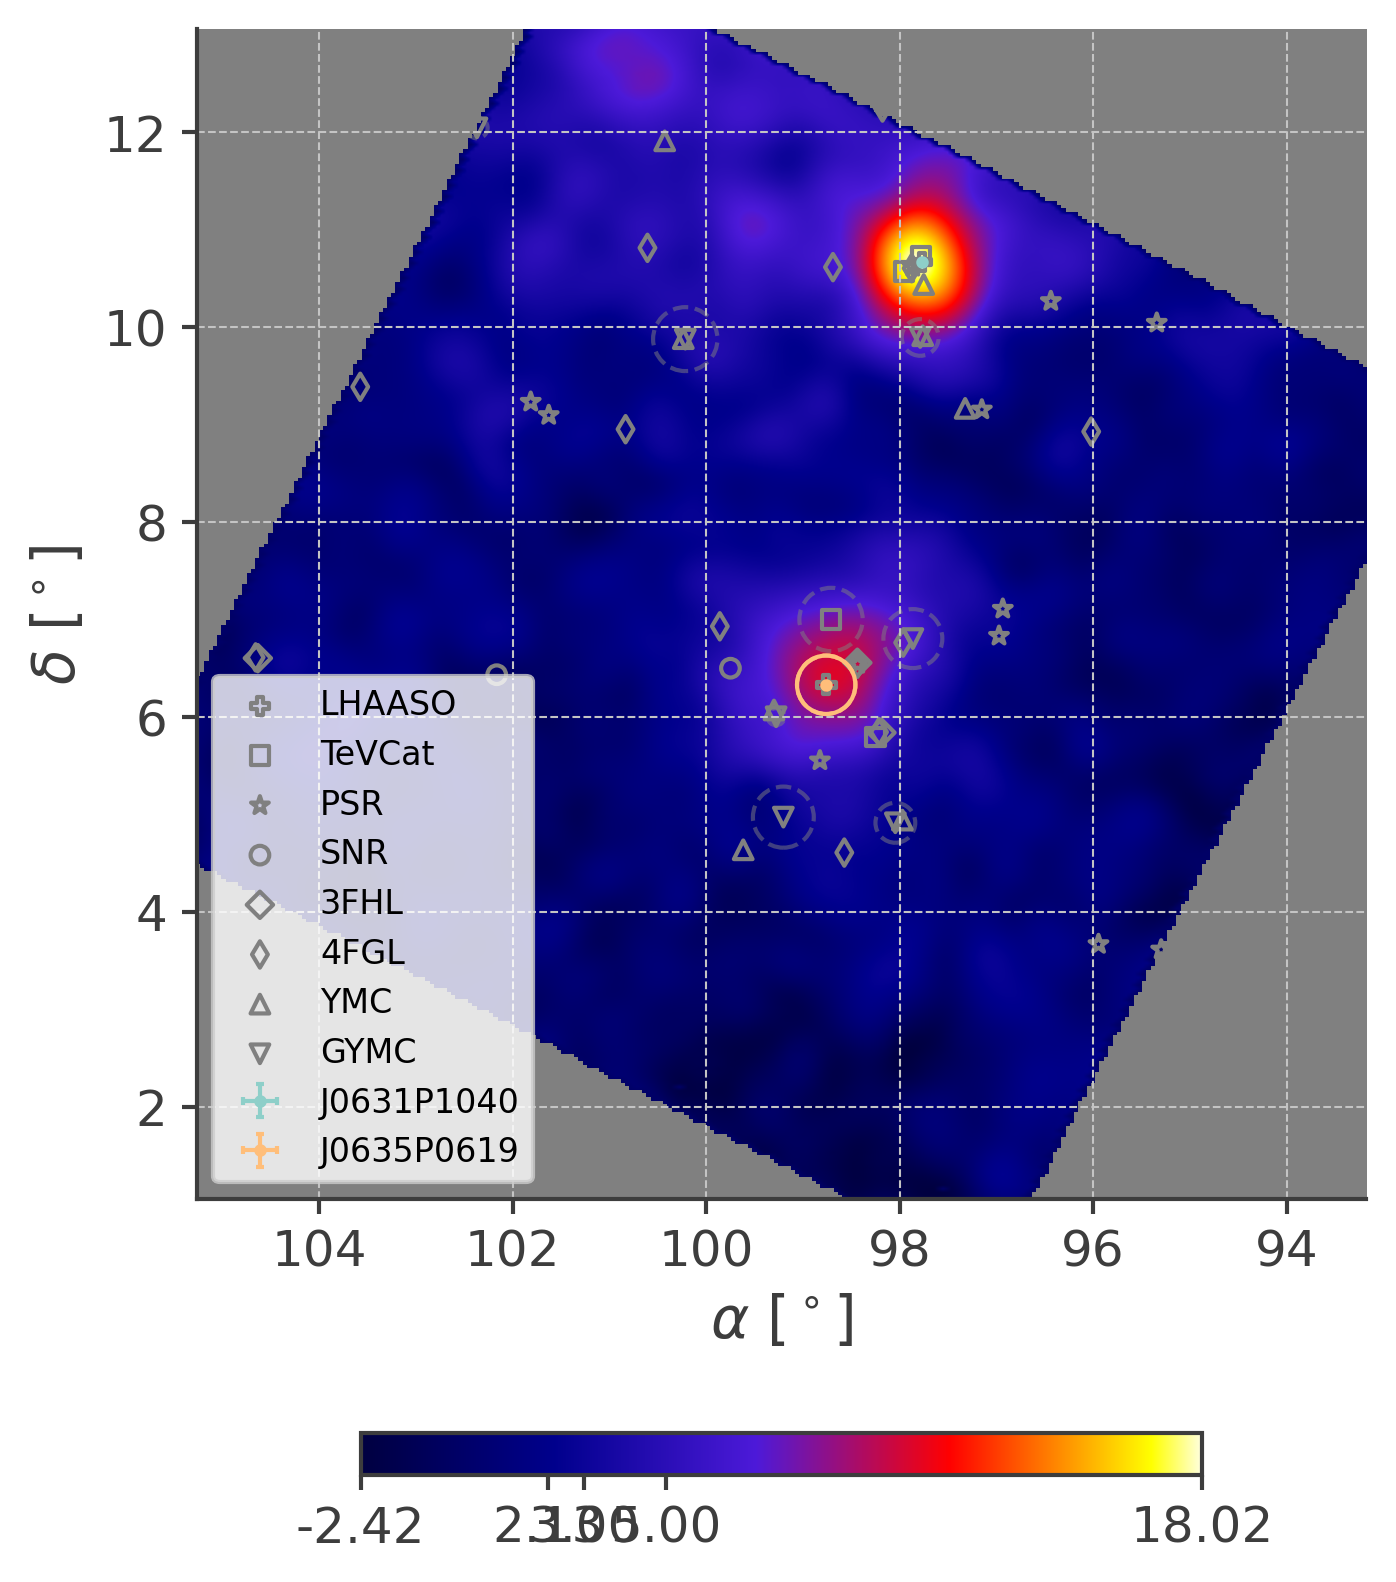

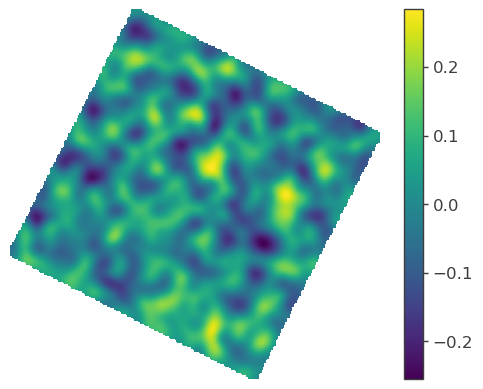

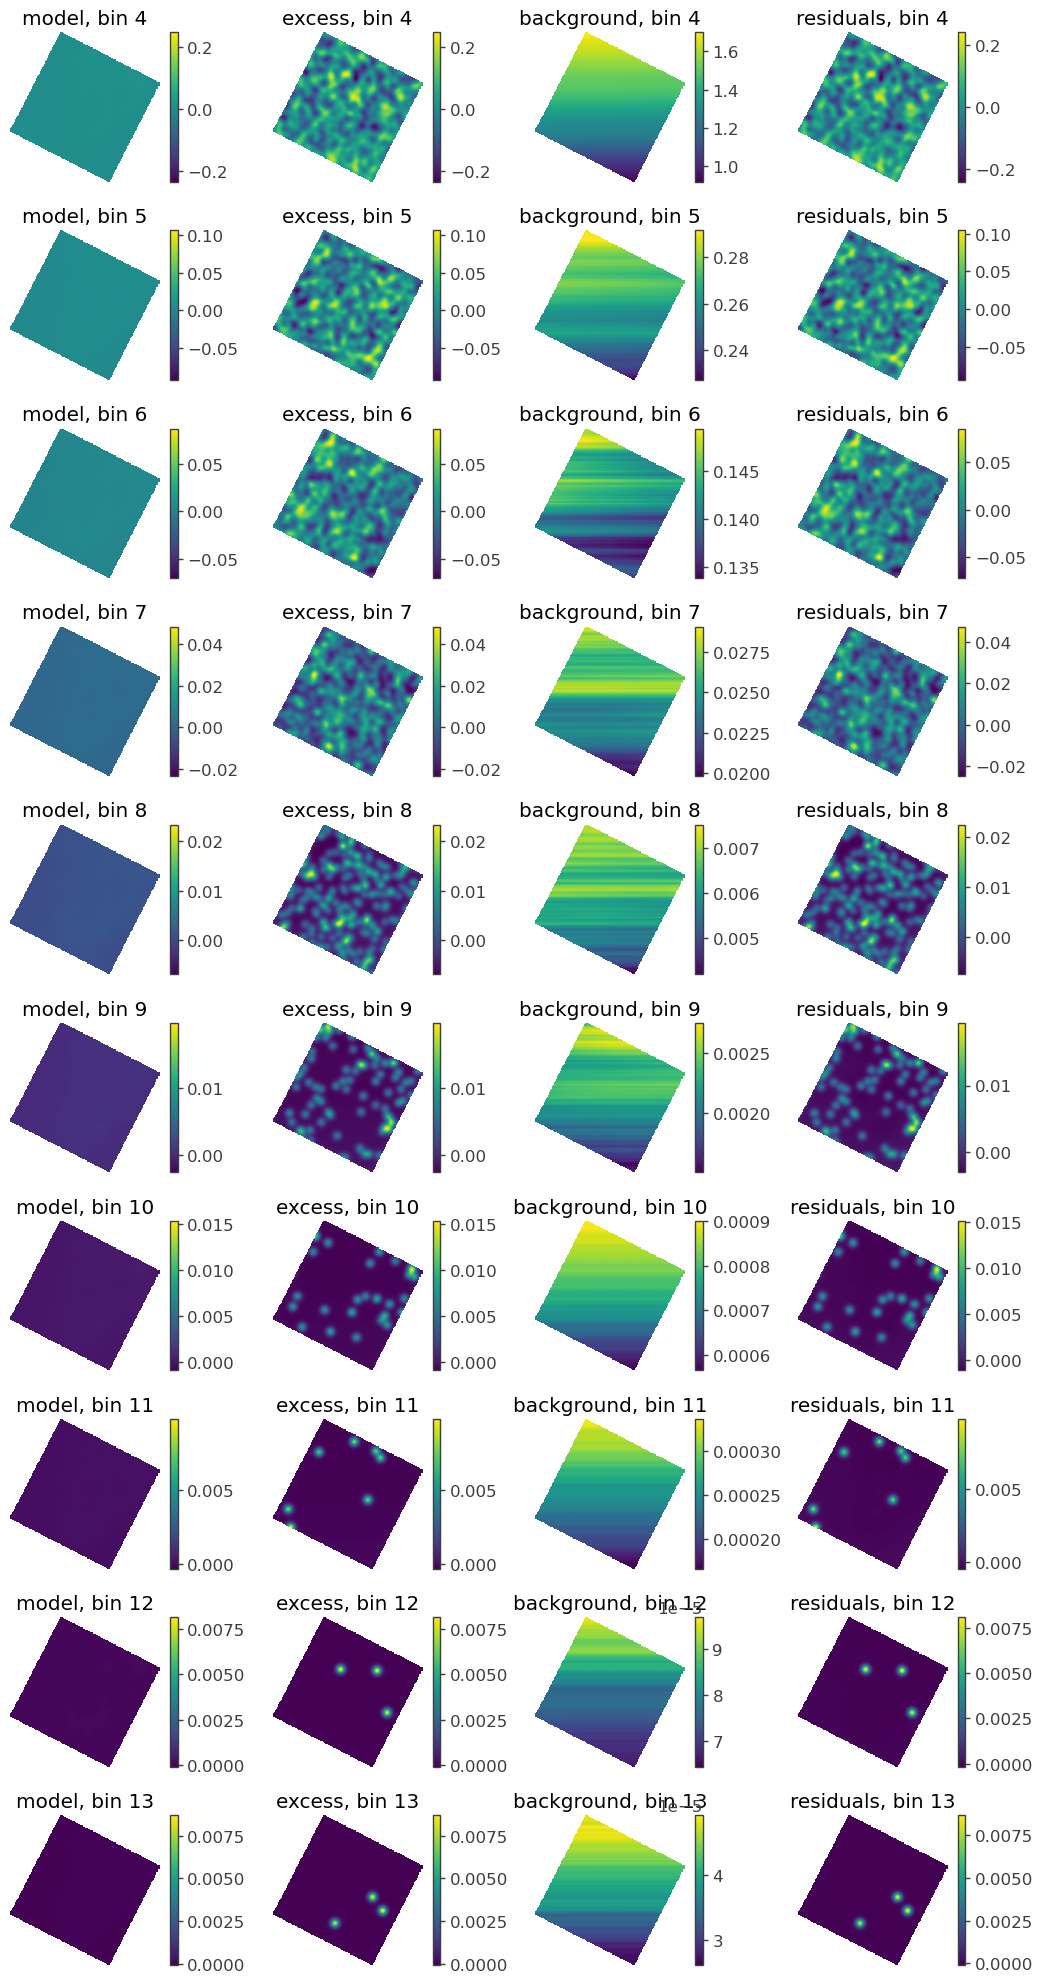

<Figure size 640x480 with 0 Axes>

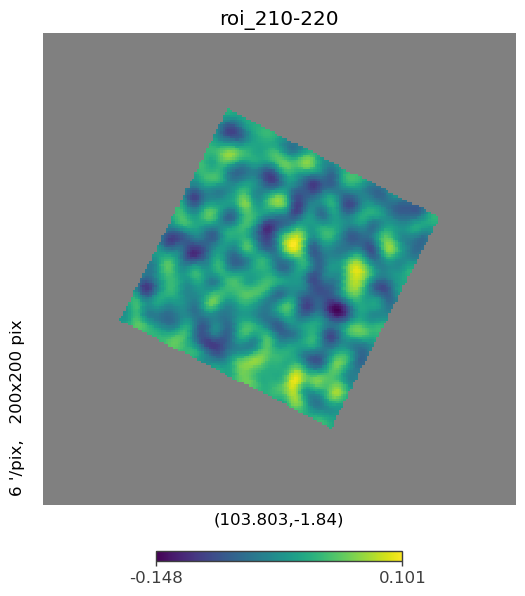

PSR:  1 103.04629166666666 -1.7084166666666667 J0652-0142
PSR:  2 104.563375 0.3764722222222222 J0658+0022
SNR:  1 102.70833333333333 -0.5 G213.0-00.6
3FHL:  1 106.53466 2.7987144 3FHL J0706.1+0247
3FHL:  2 107.447716 -2.931035 3FHL J0709.7-0255
4FGL:  1 100.4371 -3.3466 4FGL J0641.7-0320
4FGL:  2 101.6311 0.3035 4FGL J0646.5+0018
4FGL:  3 101.9494 0.5215 4FGL J0647.7+0031
4FGL:  4 103.8282 -0.631 4FGL J0655.3-0037
4FGL:  5 104.0765 -3.3686 4FGL J0656.3-0322
4FGL:  6 104.6788 -4.1187 4FGL J0658.7-0407c
4FGL:  7 105.3271 -4.0587 4FGL J0701.3-0403
4FGL:  8 105.3455 -3.4526 4FGL J0701.3-0327c
4FGL:  9 105.8367 -0.8436 4FGL J0703.3-0050
4FGL:  10 106.457 -0.0687 4FGL J0705.8-0004
4FGL:  11 106.5454 2.7772 4FGL J0706.1+0246
4FGL:  12 107.4451 -2.9301 4FGL J0709.7-0255
YMC:  1 100.97227919872333 1.3967647955299005 Teutsch_13
YMC:  2 101.27258936928233 0.2417433695032403 Dolidze_25
YMC:  3 102.20323058506654 0.38166121806046543 Bochum_2
YMC:  4 103.08078338925812 2.1916175205227857 Alessi_59


00:21:45 INFO      Region of Interest:                                                                   ]8;id=297823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=257597;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=783468;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=710251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (108.428, -10.724), model radius:     ]8;id=76529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=32902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=716160;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=130462;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=745326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=107156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=995504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=903551;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=165550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=318015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=205889;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=178577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=715775;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=9599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=224689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=264355;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=925074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=636107;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=142967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=751400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=767789;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=632741;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=83379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=45371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=397024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=833949;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=699513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=160620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=330678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=213501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING    2084.317979    2032.355917  1.025567          30455  \
1    1   1024   RING   54022.938427   54101.802034  0.998542          30455   
2    2   1024   RING  287652.830389  288050.677290  0.998619          30455   
3    3   1024   RING  361872.273369  361868.434128  1.000011          30455   
4    4   1024   RING   20817.893230   20929.013633  0.994691          30455   
5    5   1024   RING    6149.640016    5980.767738  1.028236          30455   
6    6   1024   RING    4156.622750    4222.786120  0.984332          30455   
7    7   1024   RING     676.729322     598.340163  1.131011          30455   
8    8   1024   RING     157.224860     128.490809  1.223627          30455   
9    9   1024   RING      47.188640      45.018516  1.048205          30455   
10  10   1024   RING      12.077085      14.218991  0.849363          30455   
11  11   1024   RING       9.982706       4.481001  2.227785          30455   
12  12   1024   RING       1.946862       1.792081  1.086369          30455   
13  13   1024   RING       0.000000       0.757844  0.000000          30455   

    Area (deg^2)  
0      99.846437  
1      99.846437  
2      99.846437  
3      99.846437  
4      99.846437  
5      99.846437  
6      99.846437  
7      99.846437  
8      99.846437  
9      99.846437  
10     99.846437  
11     99.846437  
12     99.846437  
13     99.846437

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=859945;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=263741;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=213595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=802626;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=448402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=55240;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=732374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=306426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=94507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=265113;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=312512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=254436;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     2356332354844148632905023601155215737538703045...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                      50000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Cache_dust...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

00:21:48 INFO      Considering 20 dec bins for extended source Diffuse              ]8;id=25821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=335306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -9.867                       ]8;id=578034;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=416923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=170844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=536871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=565964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=975037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (2.7 -1.0 +1.6) x 10^-25  \
Diffuse.spectrum.main.Powerlaw.index            -2.95 +/- 0.33   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.69
-0.69  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
KM2A        4407.569766
total       4407.569766

Values of statistical measures:

statistical measures
AIC           8819.139561
BIC           8841.065658

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

(111.796875, -10.313641266690027)


<Figure size 640x480 with 0 Axes>

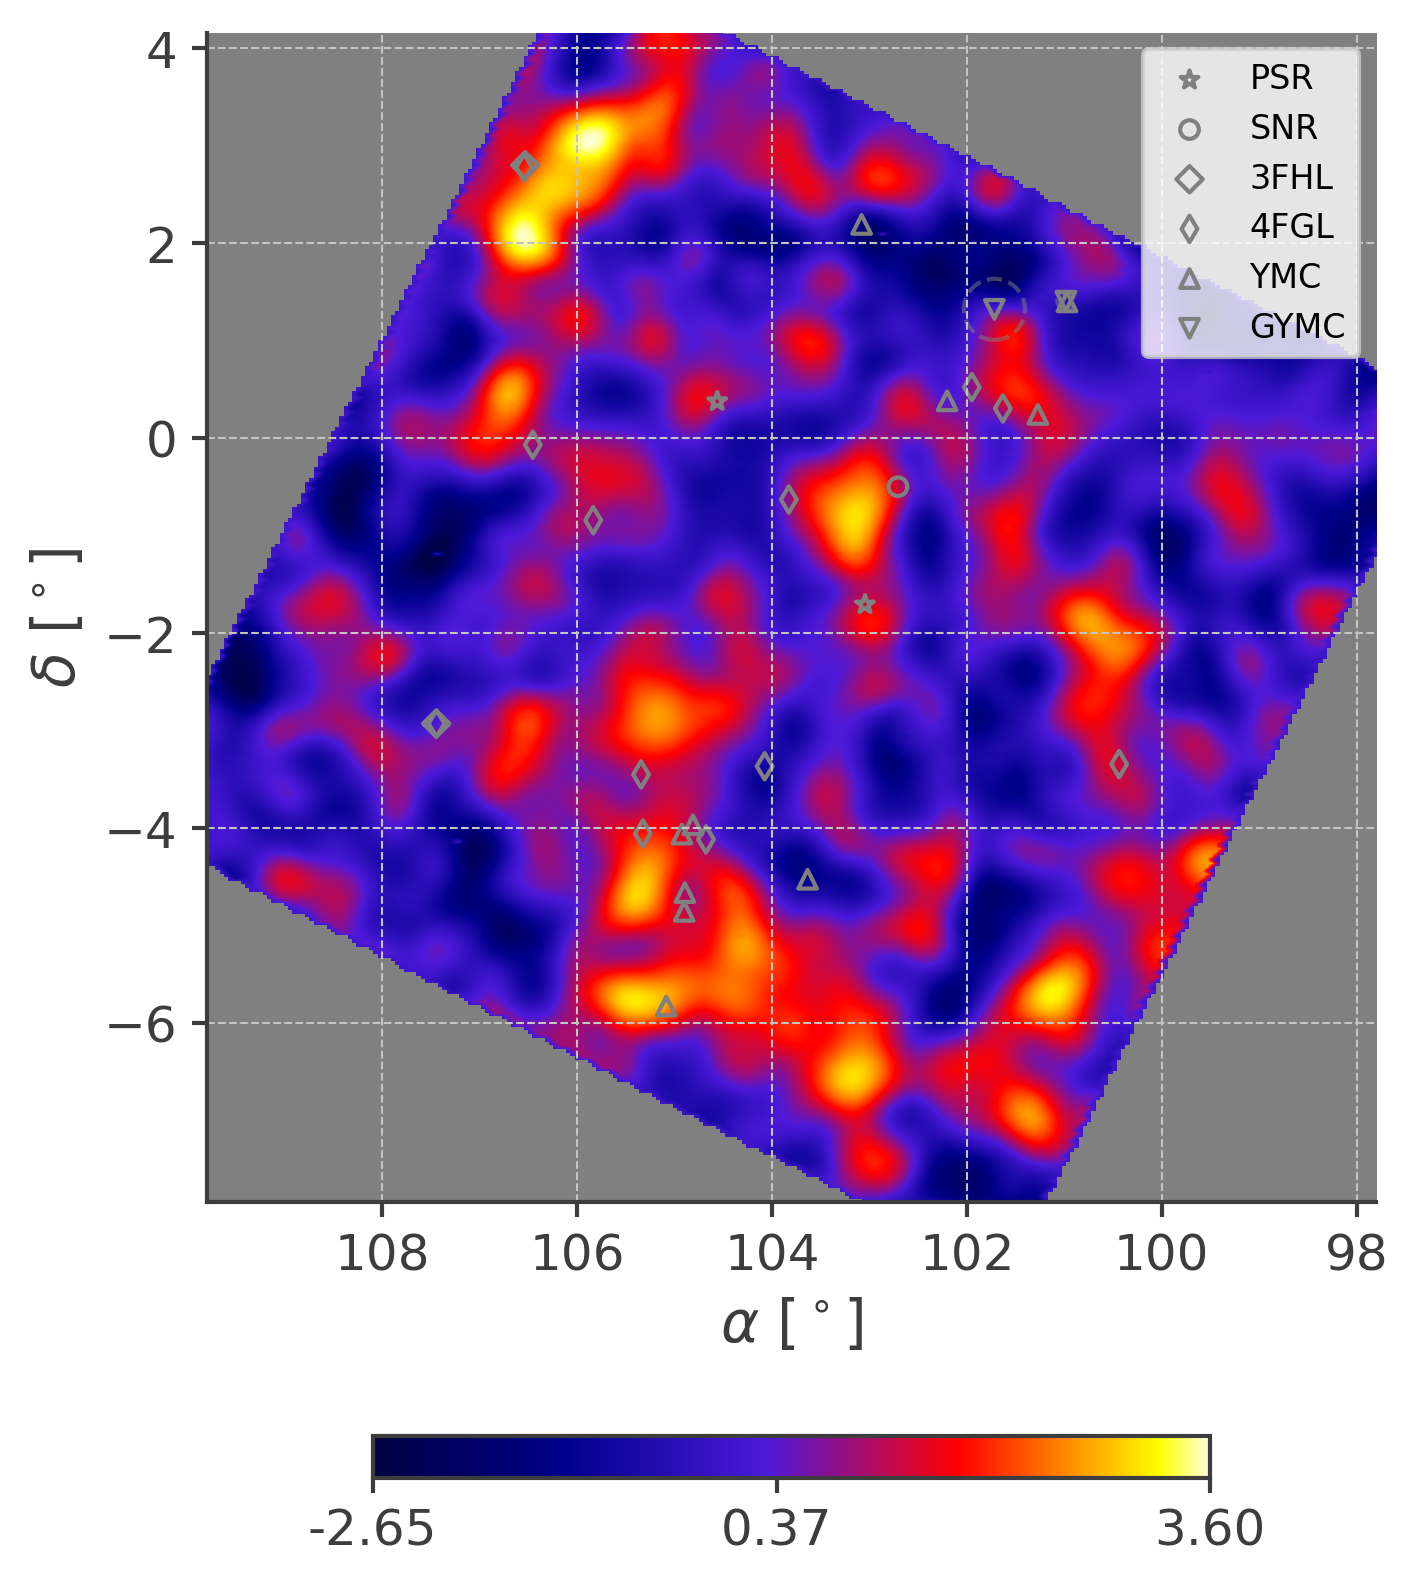

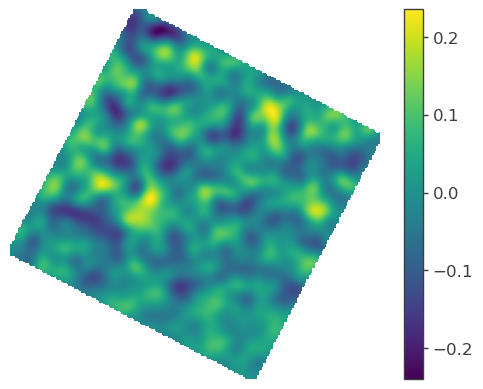

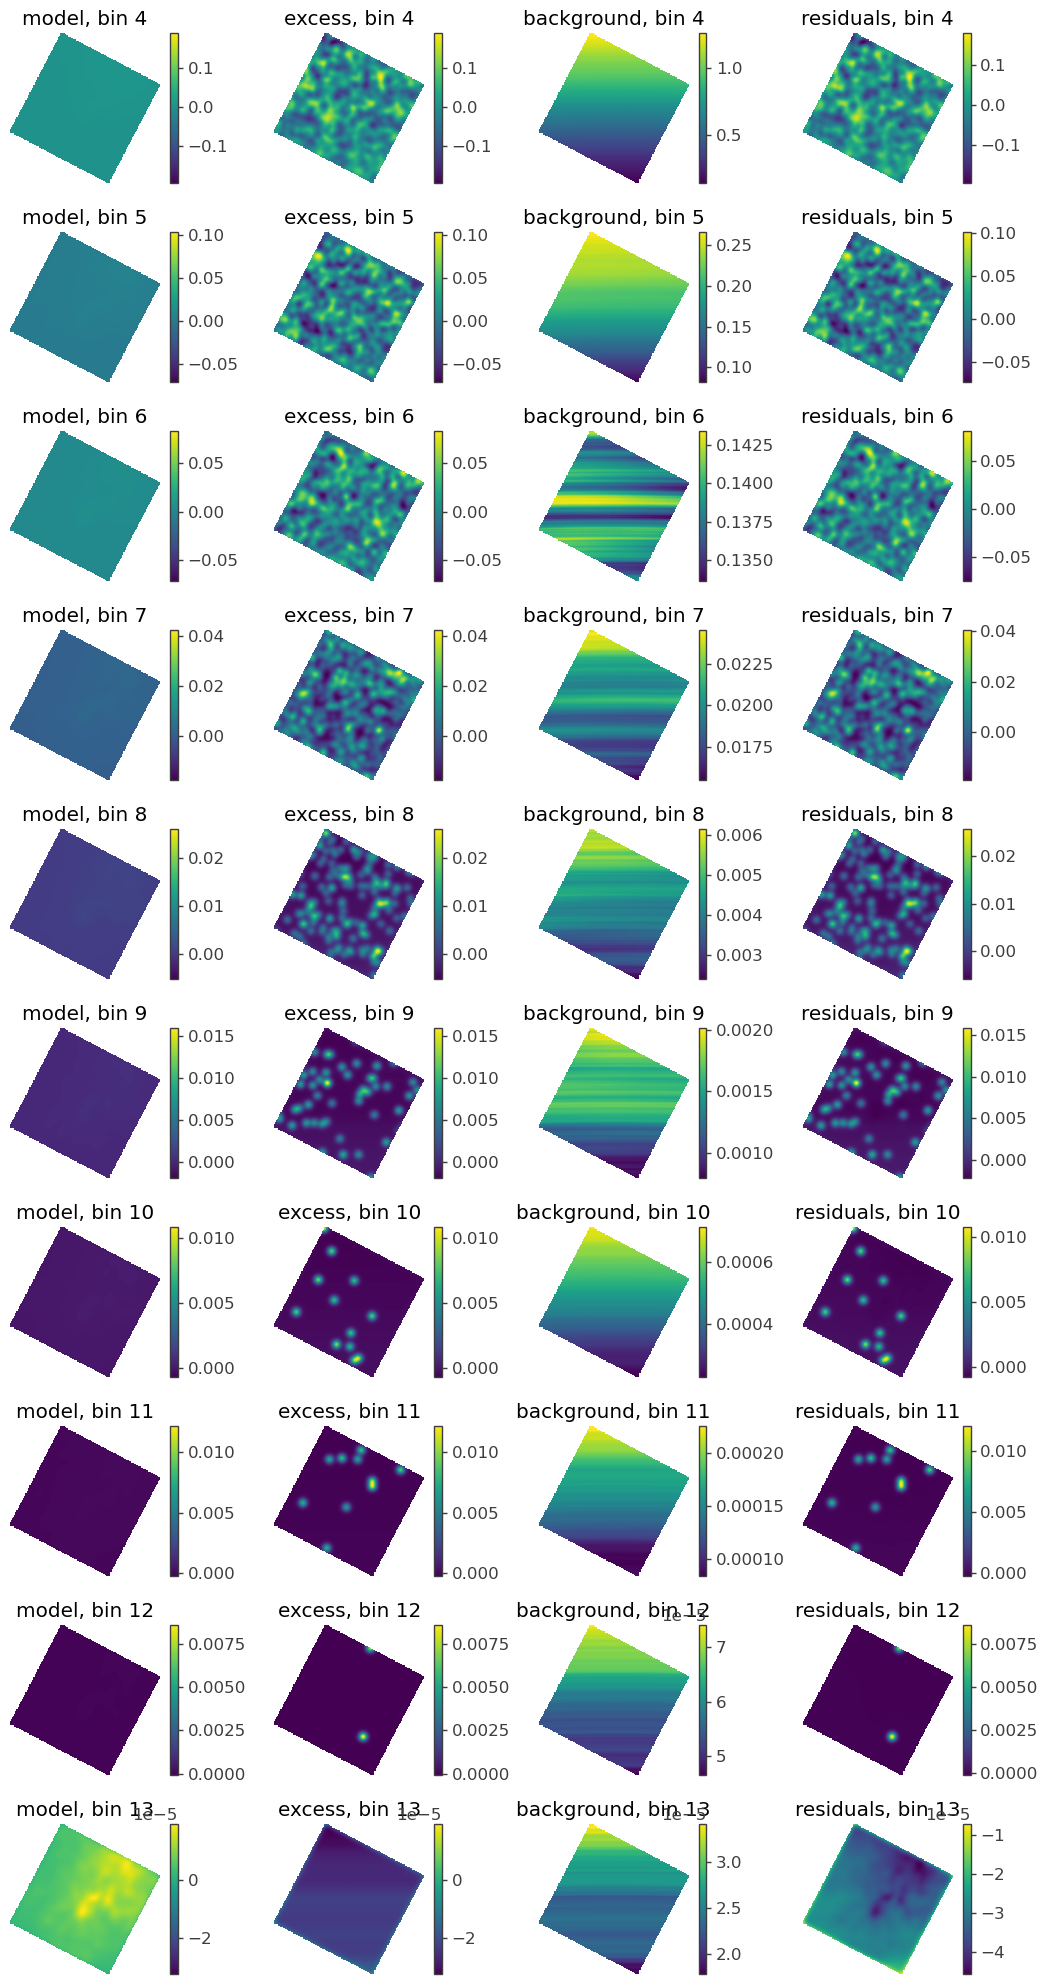

<Figure size 640x480 with 0 Axes>

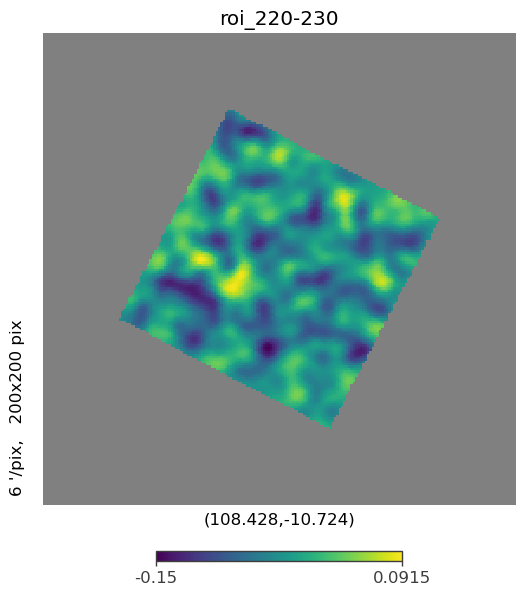

PSR:  1 111.25166666666665 -16.596055555555555 J0725-1635
PSR:  2 112.31854166666666 -14.810222222222222 J0729-1448
PSR:  3 113.49999999999999 -15.983333333333333 J0734-1559
3FHL:  1 107.29887 -15.43226 3FHL J0709.1-1525
3FHL:  2 110.75446 -7.535653 3FHL J0723.0-0732
3FHL:  3 111.392876 -5.073363 3FHL J0725.5-0504
3FHL:  4 111.43205 -5.8146234 3FHL J0725.7-0548
3FHL:  5 112.576195 -11.688636 3FHL J0730.3-1141
3FHL:  6 112.64841 -5.597354 3FHL J0730.5-0535
3FHL:  7 113.67249 -16.003048 3FHL J0734.6-1600
4FGL:  1 102.5717 -16.6012 4FGL J0650.2-1636
4FGL:  2 103.4642 -13.5104 4FGL J0653.8-1330
4FGL:  3 105.8287 -10.7092 4FGL J0703.3-1042
4FGL:  4 106.0177 -11.8863 4FGL J0704.0-1153c
4FGL:  5 106.1553 -10.9241 4FGL J0704.6-1055c
4FGL:  6 106.2319 -10.1229 4FGL J0704.9-1007c
4FGL:  7 107.295 -10.5693 4FGL J0709.1-1034c
4FGL:  8 107.3095 -15.4512 4FGL J0709.2-1527
4FGL:  9 107.8352 -9.7145 4FGL J0711.3-0942
4FGL:  10 108.9266 -11.48 4FGL J0715.7-1128
4FGL:  11 109.0239 -8.45 4FGL J0716.0-082

00:23:17 INFO      Region of Interest:                                                                   ]8;id=908141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=362523;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#271\271]8;;\

         INFO      -------------------                                                                   ]8;id=671619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=692406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#272\272]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (113.333, -19.535), model radius:     ]8;id=610682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=18354;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#128\128]8;;\
                  8.000 deg, display radius: 6.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=180586;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=294477;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#275\275]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=336337;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=816627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#276\276]8;;\

         INFO      --------------------                                                                  ]8;id=593588;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=568052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#277\277]8;;\

         INFO      Width x height: 96 x 96 px                                                            ]8;id=453242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=137776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#279\279]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=660913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=698438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#281\281]8;;\

         INFO                                                                                            ]8;id=166887;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=354980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#283\283]8;;\

         INFO      Response:                                                                             ]8;id=410480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=466444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#284\284]8;;\

         INFO      ---------                                                                             ]8;id=841323;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=321527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#285\285]8;;\

         INFO      Response file:                                                                   ]8;id=406799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=642656;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsf_DRfinal                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=68696;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=892364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=205352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=782369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=235517;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=321271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#289\289]8;;\

         INFO      Map Tree:                                                                             ]8;id=891461;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=815770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#290\290]8;;\

         INFO      ----------                                                                            ]8;id=767011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=108872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0    0   1024   RING      3.768612      4.593589  0.820407          17000  \
1    1   1024   RING    506.131221    506.945817  0.998393          17000   
2    2   1024   RING   8201.224110   8365.181234  0.980400          17000   
3    3   1024   RING  39282.560585  39365.324180  0.997898          17000   
4    4   1024   RING   2608.621474   2585.923786  1.008777          17000   
5    5   1024   RING   1287.608669   1367.225190  0.941768          17000   
6    6   1024   RING   2233.629057   2214.752820  1.008523          17000   
7    7   1024   RING    285.206015    256.119597  1.113566          17000   
8    8   1024   RING     45.863931     41.730143  1.099060          17000   
9    9   1024   RING     18.155680     13.788737  1.316704          17000   
10  10   1024   RING      4.014350      3.999926  1.003606          17000   
11  11   1024   RING      0.987194      1.498108  0.658961          17000   
12  12   1024   RING      1.943217      0.811519  2.394544          17000   
13  13   1024   RING      0.000000      0.320446  0.000000          17000   

    Area (deg^2)  
0      55.734344  
1      55.734344  
2      55.734344  
3      55.734344  
4      55.734344  
5      55.734344  
6      55.734344  
7      55.734344  
8      55.734344  
9      55.734344  
10     55.734344  
11     55.734344  
12     55.734344  
13     55.734344

         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=471334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=302081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 3.81 Mb                                                         ]8;id=182482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=753590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=503923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=529697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=429961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=512400;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      -------------------------------                                                       ]8;id=555437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=319277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=506619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=114735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  1
Particle sources  0

Free parameters (2):
--------------------

                                      value min_value max_value   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (4):
---------------------

                                                                                value   
Diffuse.SpatialTemplate_2D.K                                                      1.0  \
Diffuse.SpatialTemplate_2D.hash     4410406083941586373814720237106393776108333282...   
Diffuse.SpatialTemplate_2D.ihdu                                                   0.0   
Diffuse.spectrum.main.Powerlaw.piv                                      50000000000.0   

                                   min_value max_value   unit  
Diffuse.SpatialTemplate_2D.K            None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash         None      None         
Diffuse.SpatialTemplate_2D.ihdu          0.0      None         
Diffuse.spectrum.main.Powerlaw.piv      None      None    keV  

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  /data/home/cwy/Science/3MLWCDA/data/Cache_dust...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

The kernel is too large with respect to the model image. Enlarge your model radius.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.000000; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.955918; expected 1.0+-0.01.


00:23:21 INFO      Considering 15 dec bins for extended source Diffuse              ]8;id=426566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=563964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#70\70]8;;\

         INFO      Central bin is bin at Declination = -16.451                      ]8;id=13131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=947625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#79\79]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=427592;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=91212;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=481644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=359251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

 63%|██████▎   | 22/35 [1:32:35<54:42, 252.53s/it]


FitFailed: MIGRAD did not converge. Reason: Edm is above maximum (status: 3)

<Figure size 640x480 with 0 Axes>

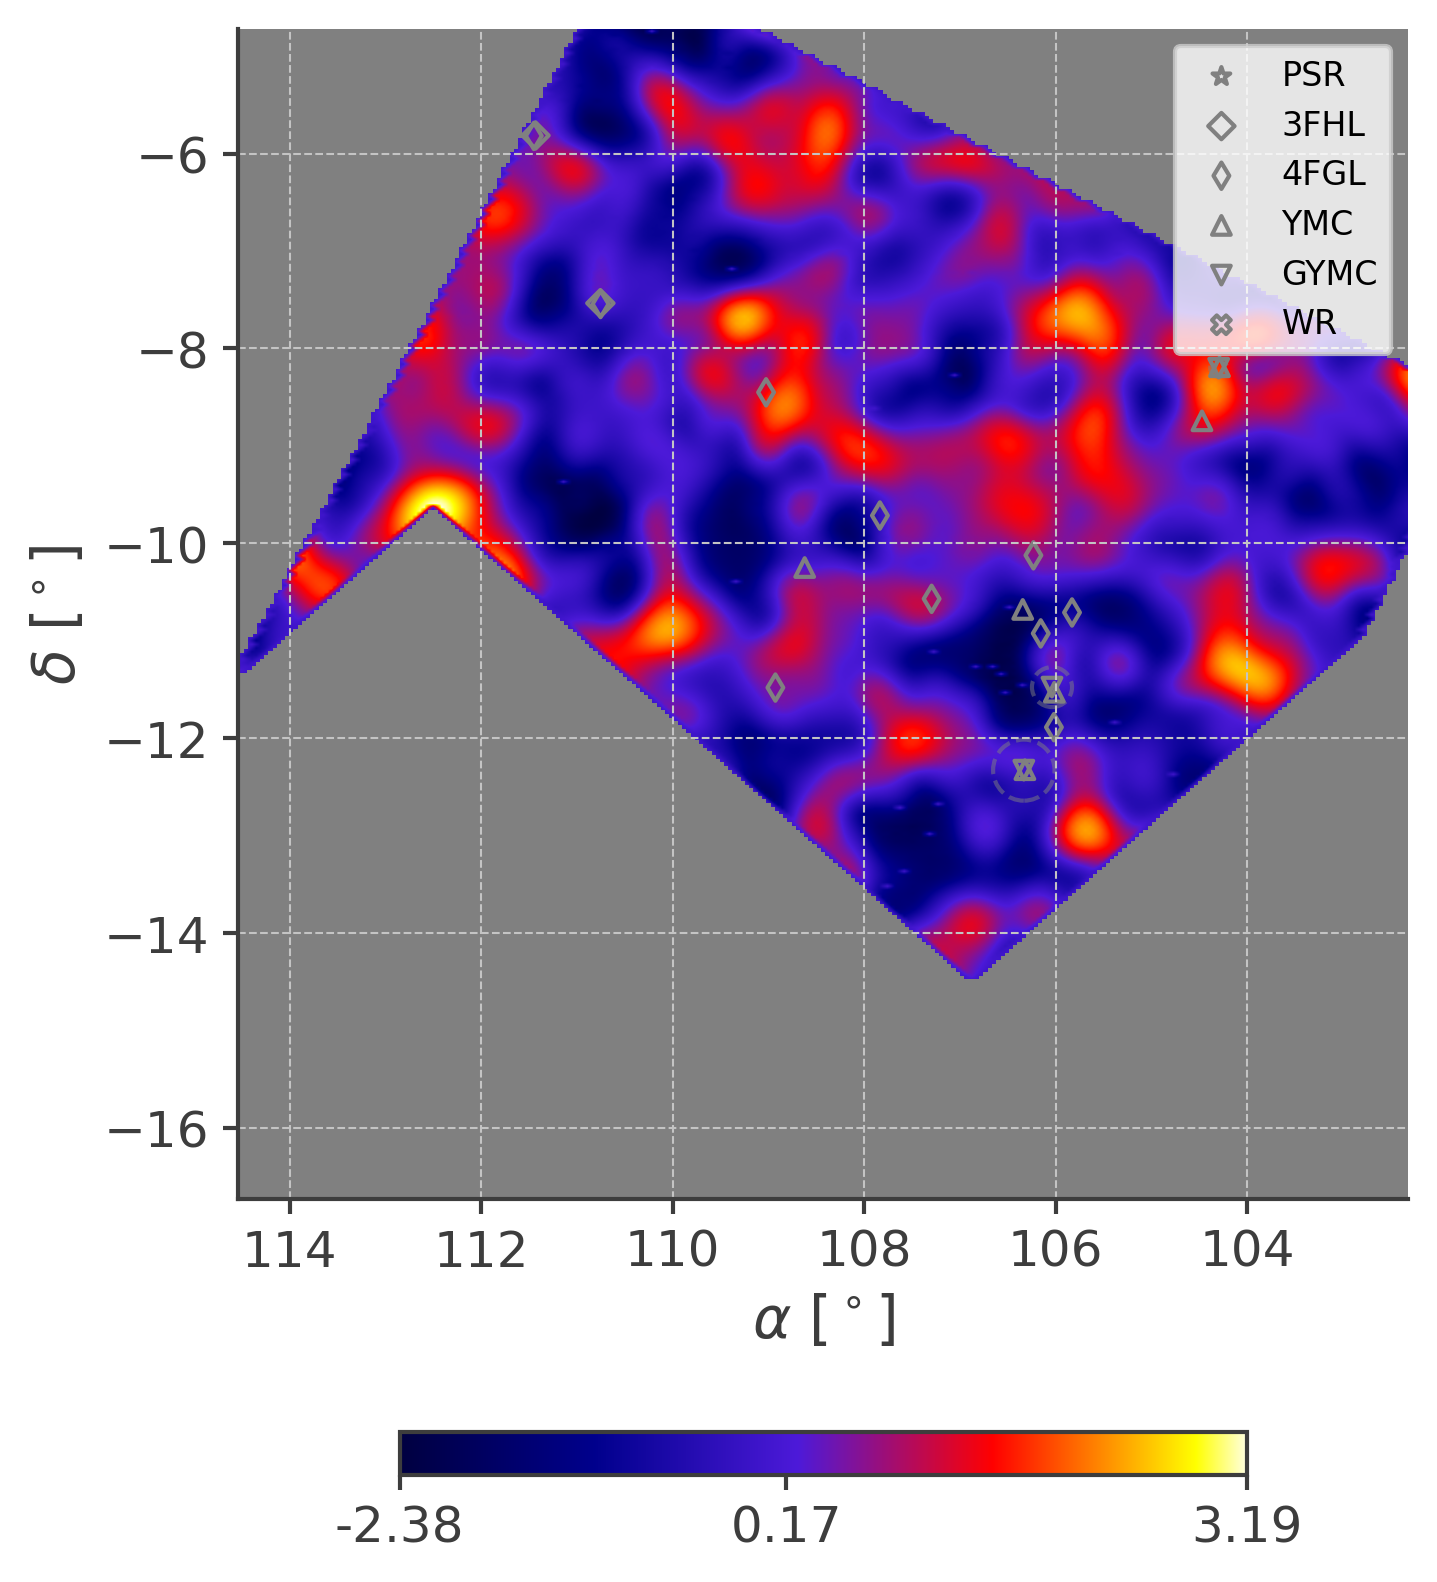

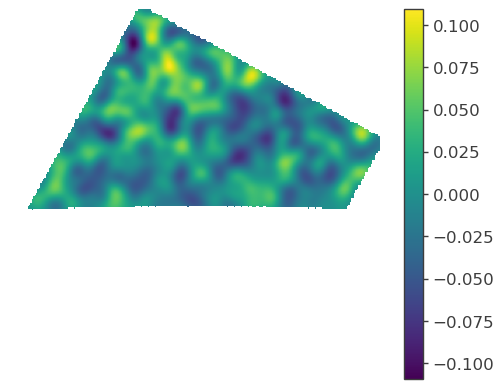

In [7]:
%matplotlib inline
#####   Data Initialize

maptree = "../../data/KM2A1234full_skymap_rcy.root"
response = "../../data/KM2A1234full_mcpsf_DRfinal.root"

region_name="Diffuse_KM2A"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))):
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 8.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=2,  detector="KM2A", roi=roi, pf=True)

    Diffuse = my.set_diffusebkg(
                ra1, dec1, 7, 7, Kf=False, indexf=False, piv=50
                )
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT")
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi"
                    )


In [8]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall.npy",results)

Text(0.5, 0, '$GLON^{o}$')

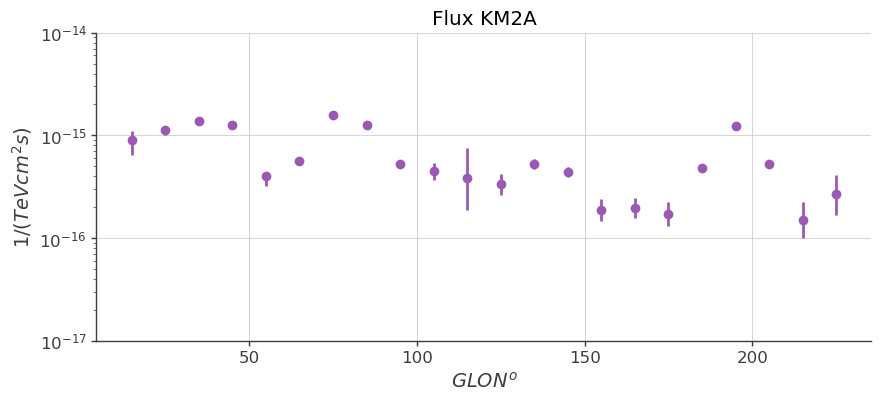

In [17]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, np.array(dk)*1e9, [np.array(den)*1e9, np.array(dep)*1e9], fmt="o") #
plt.yscale("log")
plt.title("Flux KM2A")
plt.ylim(1e-17,1e-14)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")

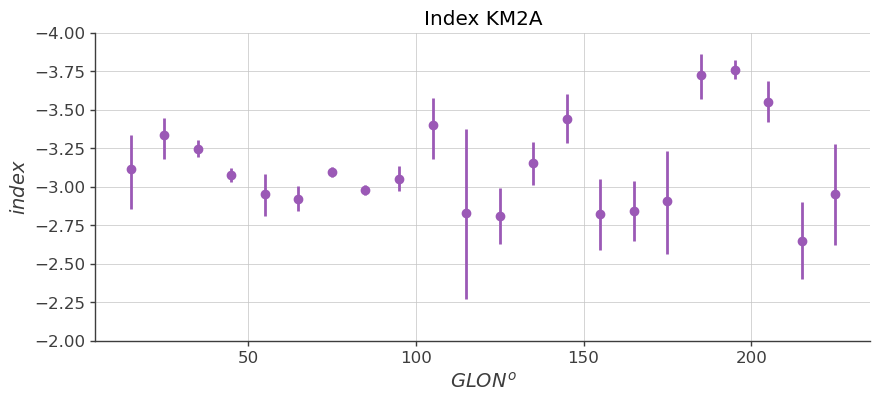

In [16]:
plt.figure(figsize=(10,4))
plt.errorbar(gc, di, [die, diep], fmt="o")
plt.ylim(-2,-4)
plt.title("Index KM2A")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()